# Chapter 6. AI 기초 - 개요
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

# 1. Perceptron(퍼셉트론)
* 인공 신경망의 구성 요소로서 다수의 값을 입력받아 하나의 값으로 출력하는 알고리즘
* 이해를 위한 간단한 퍼셉트론  
1차 방정식 : y = ax + b → 벡터 표현 : y = WX + b

## Ex) 간단한 퍼셉트론 Class 구현

### 학습 능력이 없는 1차 방정식

In [1]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    def predict(self, x) :
        return x * self.w + self.b

In [2]:
p = Perceptron()
p.predict(7)

7

### 학습 능력을 부여

In [3]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        p = self.predict(x) # P : output
        e = y - p # e : error(예측값과 정답의 차이)
        self.w += e # w 를 error 만큼 조정
        self.b += e # b 를 error 만큼 조정
    
    def predict(self, x) :
        return x * self.w + self.b

In [4]:
import numpy as np

In [5]:
X = np.random.randn(30)
Y = 3*X + 1
Y

array([ 4.98253441, -3.50068421,  4.46079639, -0.08826108,  0.61559204,
        2.00614057,  1.33730783, -1.96658014, -2.91380153, -2.38941043,
        0.63076698,  4.65475494, -1.52817736,  4.91194305, -5.71179402,
        2.44416524, -1.48730326,  3.83342464,  0.28704959, -4.90564732,
        3.46935746,  4.83342951, -2.73813153,  0.2223114 , -1.89717675,
        4.74427897, -0.92195264, -0.22624472, -0.55816421,  1.21836414])

In [6]:
perc = Perceptron()

for x, y in zip(X, Y) :
    perc.fit(x, y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 4.6550, b : 3.6550
w : 4.4829, b : 3.4829
w : 0.2893, b : -0.7107
w : 1.0167, b : 0.0167
w : 1.7459, b : 0.7459
w : 2.4206, b : 1.4206
w : 2.0651, b : 1.0651
w : 1.0756, b : 0.0756
w : -0.5106, b : -1.5106
w : -1.9663, b : -2.9663
w : 1.3888, b : 0.3888
w : 3.9629, b : 2.9629
w : 2.8115, b : 1.8115
w : 2.2459, b : 1.2459
w : 0.3128, b : -0.6872
w : 3.2936, b : 2.2936
w : 2.2434, b : 1.2434
w : 2.7146, b : 1.7146
w : 1.9322, b : 0.9322
w : -0.1021, b : -1.1021
w : 4.5534, b : 3.5534
w : 0.0151, b : -0.9849
w : -1.7194, b : -2.7194
w : 0.7766, b : -0.2234
w : -0.1472, b : -1.1472
w : 5.9280, b : 4.9280
w : 3.8758, b : 2.8758
w : 2.3580, b : 1.3580
w : 1.6665, b : 0.6665
w : 2.0971, b : 1.0971


* 예측한 값의 차이가 많이 나는 것을 확인

#### 모델 조정 1
w가 x에 영향을 미치기 때문에 error에 x를 곱해서 조정해준다.

In [7]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        # p : output
        p = self.predict(x) 
        
        # e : error(예측값과 정답의 차이)
        e = y - p 
        
        # w 를 error 만큼 조정
        self.w += e * x
        
        # b 를 error 만큼 조정
        self.b += e 
    
    def predict(self, x) :
        return x * self.w + self.b

In [8]:
perc = Perceptron()

# 벡터의 요소를 하나씩 꺼내서 학습
for x, y in zip(X, Y) :
    perc.fit(x, y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 5.8521, b : 3.6550
w : 3.4161, b : 5.2788
w : -2.0736, b : 0.5200
w : -1.5801, b : -0.8405
w : -1.7407, b : 0.4131
w : -1.0107, b : 2.5899
w : -1.1387, b : 1.4509
w : 3.3542, b : -3.0926
w : -2.5879, b : 1.4621
w : 5.0669, b : -5.3132
w : 4.2586, b : 1.2544
w : 2.0808, b : -0.5333
w : 1.4415, b : 0.2253
w : 5.1017, b : 3.0323
w : -0.8713, b : 5.7021
w : -2.2377, b : 2.8636
w : 2.9078, b : -3.3426
w : 7.0915, b : 1.0870
w : 6.8811, b : 1.9723
w : -6.2448, b : 8.6401
w : -6.2699, b : 8.6095
w : -0.8575, b : 12.8452
w : 19.8914, b : -3.8067
w : 17.5103, b : 5.3788
w : 8.2063, b : 15.0130
w : -17.3932, b : -5.4979
w : -13.1861, b : -12.0649
w : -15.8220, b : -5.6160
w : -14.1808, b : -8.7759
w : -13.3782, b : 2.2506


* 예측한 값이 반복을 거듭하며 잘 찾아가는 것을 확인

#### 모델 조정 2
앞선 모델처럼 벡터의 요소를 출력하여 학습을 진행하는 것이 아닌 벡터로 바로 연산이 가능하도록 모델을 조정해준다.

In [9]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        # p : output
        p = self.predict(x) 
        
        # e : error(예측값과 정답의 차이)
        e = y - p 
        
        # w 를 error 만큼 조정
        # np.dot() : 하나하나 곱한 후 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.w += np.dot(e, x)
        
        # b 를 error 만큼 조정
        # np.sum() : 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.b += np.sum(e)
    
    def predict(self, x) :
        return x * self.w + self.b

In [10]:
perc = Perceptron()

# 예측의 정확도를 높이기 위해 반복 학습
for _ in range(10) :
    perc.fit(X, Y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 58.6149, b : 19.2126
w : -1595.2586, b : -227.1950
w : 47525.9216, b : -2001.8781
w : -1460452.7547, b : 314409.0374
w : 46245987.8812, b : -16995098.1570
w : -1502367311.0179, b : 742295030.9899
w : 49832362894.8754, b : -29629880485.7418
w : -1679915487716.7131, b : 1128047550036.5552
w : 57328978194441.5078, b : -41774345865820.6797
w : -1974098041547698.7500, b : 1520671570102249.0000


* 예측한 값이 많이 튀는 것을 확인

#### 모델 조정 3
x의 길이만큼 줄여 평균 error가 반환되어 값을 예측할 수 있도록 조정해준다.

In [11]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        # p : output
        p = self.predict(x) 
        
        # e : error(예측값과 정답의 차이)
        # len(x) : x의 길이를 줄여 error가 평균 error로 변환
        e = (y - p) / len(x)
        
        # w 를 error 만큼 조정
        # np.dot() : 하나하나 곱한 후 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.w += np.dot(e, x)
        
        # b 를 error 만큼 조정
        # np.sum() : 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.b += np.sum(e)
    
    def predict(self, x) :
        return x * self.w + self.b

In [12]:
perc = Perceptron()

# 예측의 정확도를 높이기 위해 반복 학습
for _ in range(10) :
    perc.fit(X, Y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 2.9205, b : 0.6404
w : 2.9393, b : 0.9857
w : 3.0005, b : 0.9891
w : 2.9980, b : 1.0001
w : 3.0001, b : 0.9996
w : 2.9999, b : 1.0000
w : 3.0000, b : 1.0000
w : 3.0000, b : 1.0000
w : 3.0000, b : 1.0000
w : 3.0000, b : 1.0000


* 예측한 값이 반복을 거듭하며 잘 찾아가는 것을 확인

#### 모델 조정 4
learning rate를 설정해준다.  

* learning rate : 학습의 속도와 정확도에 영향  

* Learing Rate 적정 값  
ML에서 0.01 을 기준으로 +-  
DL에서 0.0001 또는 0.00001 을 기준으로 +-  

In [13]:
class Perceptron :
    def __init__(self, lr = 0.1) :
        self.w = 1
        self.b = 0
        self.lr = lr # learning_rate : 학습률
    
    def fit(self, x, y) : # x : input, y : answer
        # P : output
        p = self.predict(x)
        
        # e : error(예측값과 정답의 차이)
        # len(x) : x의 길이를 줄여 error가 평균 error로 변환
        e = (y - p) / len(x)
        
        # w 를 error * x 만큼 조정 : w는 x에 영향을 미치기 때문
        # np.dot() : 하나하나 곱한 후 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.w += self.lr * np.dot(e, x)
        
        # b 를 error 만큼 조정
        # np.sum() : 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.b += self.lr * np.sum(e)
    
    def predict(self, x) :
        return x * self.w + self.b

In [14]:
perc = Perceptron(lr = 0.2)

for _ in range(30) :
    perc.fit(X, Y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 1.3841, b : 0.1281
w : 1.6921, b : 0.2444
w : 1.9397, b : 0.3485
w : 2.1389, b : 0.4406
w : 2.2997, b : 0.5216
w : 2.4295, b : 0.5921
w : 2.5347, b : 0.6531
w : 2.6199, b : 0.7058
w : 2.6892, b : 0.7510
w : 2.7455, b : 0.7896
w : 2.7914, b : 0.8225
w : 2.8288, b : 0.8505
w : 2.8594, b : 0.8743
w : 2.8844, b : 0.8943
w : 2.9049, b : 0.9113
w : 2.9217, b : 0.9256
w : 2.9355, b : 0.9377
w : 2.9468, b : 0.9478
w : 2.9561, b : 0.9564
w : 2.9637, b : 0.9635
w : 2.9700, b : 0.9695
w : 2.9752, b : 0.9745
w : 2.9795, b : 0.9787
w : 2.9831, b : 0.9822
w : 2.9860, b : 0.9852
w : 2.9884, b : 0.9876
w : 2.9904, b : 0.9897
w : 2.9920, b : 0.9914
w : 2.9934, b : 0.9928
w : 2.9945, b : 0.9940


# 2. Iris Data로 Perceptron 구현

In [15]:
import pandas as pd
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(data_url, header = None)
data.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Setosa 분류
* Setosa면 -1
* Setosa가 아니면 1

In [17]:
X = data.iloc[:,:4].values
Y = data.iloc[:,4].values

X = X[:,[0,2]]
Y = np.where(Y == 'Iris-setosa', -1, 1)

In [18]:
X[np.ravel([Y == -1]),0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [19]:
np.ravel(Y)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### Scatter Plot 1

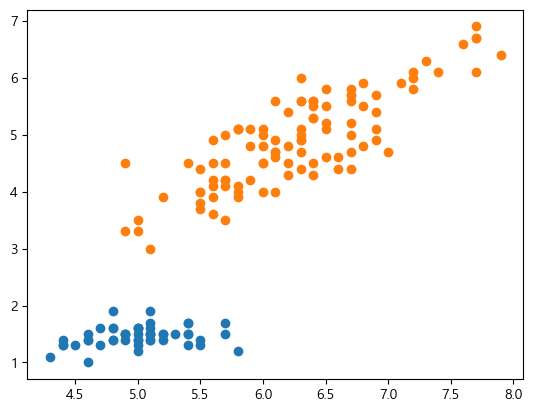

In [20]:
plt.figure()

# plt.scatter(X[:,0], X[:,1])
plt.scatter(X[np.ravel([Y == -1]),0], X[np.ravel([Y == -1]),1])
plt.scatter(X[np.ravel([Y == 1]),0], X[np.ravel([Y == 1]),1])

plt.show()

### Perceptron

In [21]:
class Perceptron(object): 
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=False, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [22]:
perc = Perceptron(eta = 0.1, n_iter = 10, shuffle = True)
perc.fit(X, Y)

In [23]:
perc.errors_

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
perc.w_

array([-0.18375655, -0.52611756,  1.31471828])

### Scatter Plot 2

In [25]:
from matplotlib.colors import ListedColormap

In [26]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[np.ravel([y == cl]), 0],
                    y=X[np.ravel([y == cl]), 1],
                    alpha=0.8,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('sepal length(cm)')
    plt.ylabel('petal length(cm)')

    plt.legend()
    plt.show()

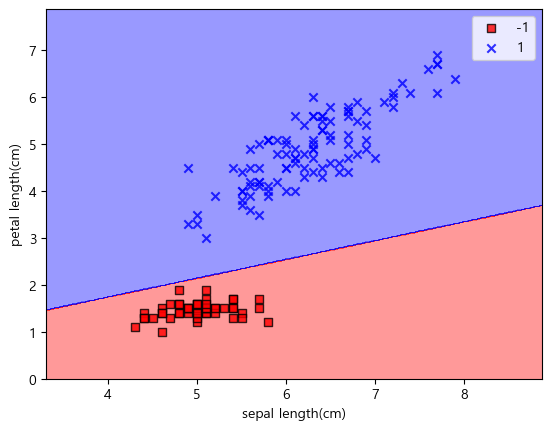

In [27]:
plot_decision_regions(X, Y, perc)